In [101]:
from pandas import Series,DataFrame
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import mpl
import datetime
import time

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False


def compute_net_basic(path, name, days):
    df = pd.read_csv(path)
    df = df.tail(days)
    total = len(df)
    year = total / 250
    print(total)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,3))

    bin = np.arange(0,10,0.2)
    cut = pd.cut(df['pcnt_real_time'], bins=bin, labels=bin[:-1], right=False)
    counts = pd.value_counts(cut,sort=False)
    sum_counts = (total - counts.cumsum().to_frame()) / total

    sum_counts.plot(title=name + ' 网格频率（单位：频率）', ax=axes[0])
    axes[0].grid()

    ii = list(sum_counts.index)
    sum_counts['index'] = ii
    earn = sum_counts['pcnt_real_time'] * sum_counts['index'] * sum_counts['index']
    earn = earn.to_frame()
    earn.columns = ['earn']

    year_earn_rate = earn['earn'] * total / 100 / year # 年化收益
    year_earn_rate = year_earn_rate.to_frame()
    year_earn_rate.columns = ['earn_rate']
    year_earn_rate.plot(title=name + ' 年化利润率（单位 %）', ax=axes[1]) 
    axes[1].grid()

    plt.show()


def compute_constant_net_risk(init_money, extra_money, current_price, buy_stock=0, buy_money=0):
    # 计算网格风险值：市值稳定网格法的情况下
    # 画一张图出来，根据网格的变化，求最大回撤，和网格范围
    steps = np.arange(0.1,8,0.1)
    df = DataFrame()
    for s in steps:
        price = current_price
        stock = init_money // (current_price * 100)
        left_money = extra_money
     
        if buy_stock == 0:
            once_money = buy_money
        else:
            once_money = buy_stock * price
     
        while left_money >= once_money and price > 0.01:
            price = price * (1 - s / 100)
            if buy_stock == 0:
                once_money = buy_money
            else:
                once_money = buy_stock * price
     
            if buy_stock == 0:
                stock += buy_money // (price * 100)
                left_money -= buy_money // (price * 100) * (price * 100)
            else:
                stock += buy_stock / 100
                left_money -= buy_stock * price
        
        back_rate = (stock*100*price + left_money) / (init_money + extra_money) * 100
        df[s] = [price, back_rate, stock*100*price]
     
    df = df.T
    df.columns = ['last_price', 'back', 'last_value']
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,3))
    df['last_price'].plot(title='最低价格', ax=axes[0])
    axes[0].grid()
    df['back'].plot(title='最低价格时总回撤', ax=axes[1])
    axes[1].grid()
    df['last_value'].plot(title='最低价格时总市值', ax=axes[2])
    axes[2].grid()

In [ ]:
print("调用全部运行，开始更新所有数据... ...")
%run fetch.py

2115


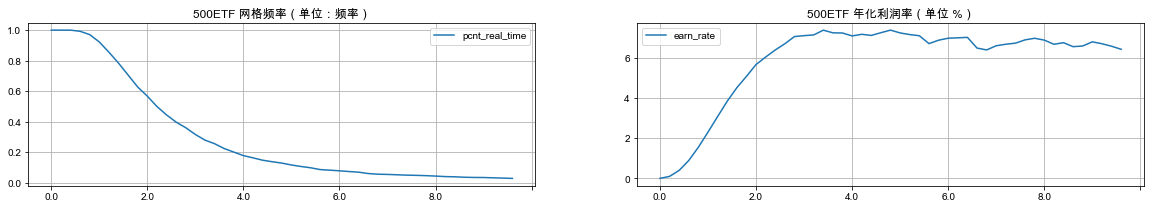

439


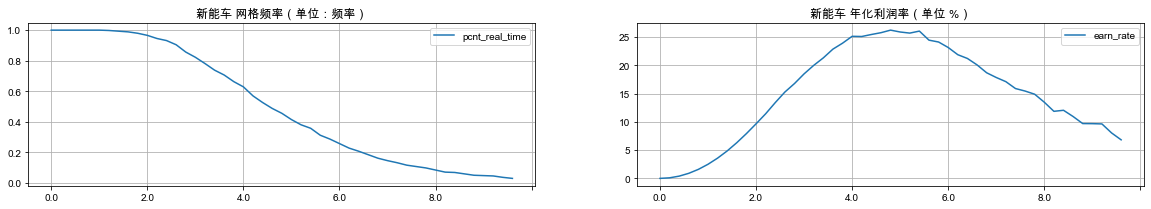

410


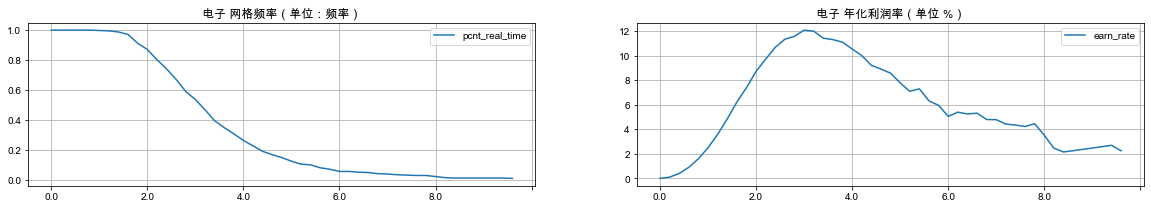

1994


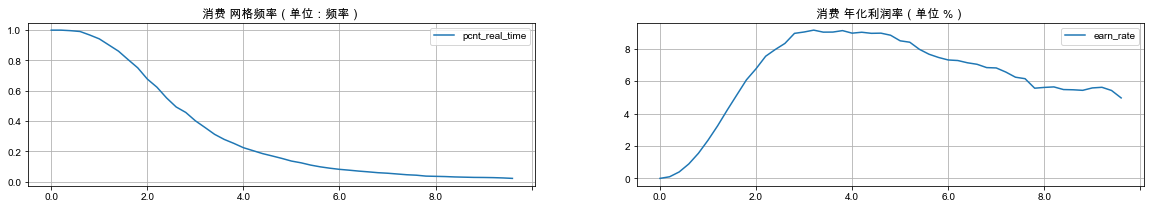

1969


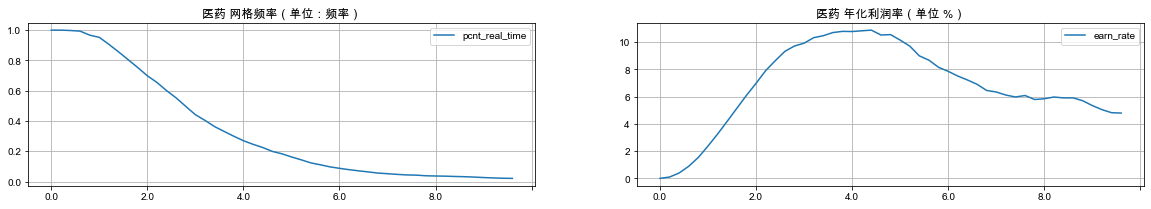

14


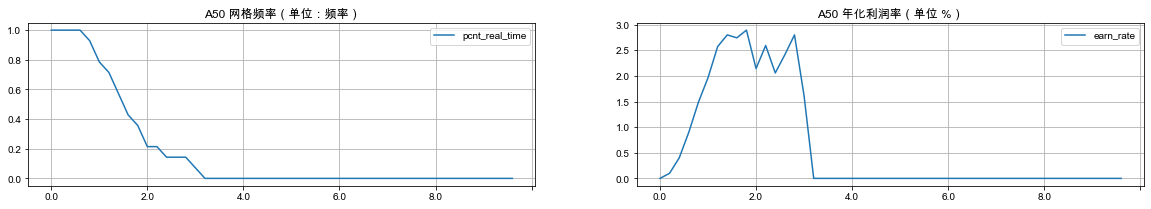

1012


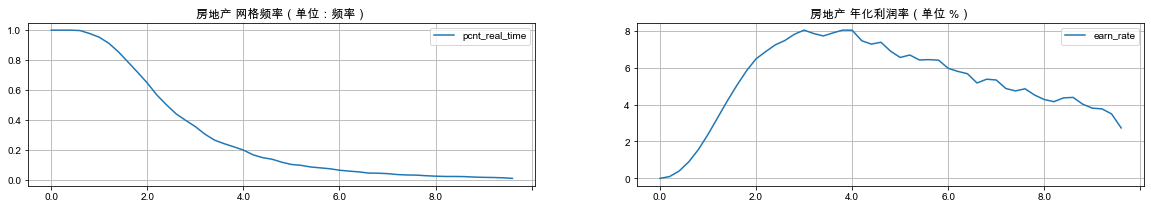

1262


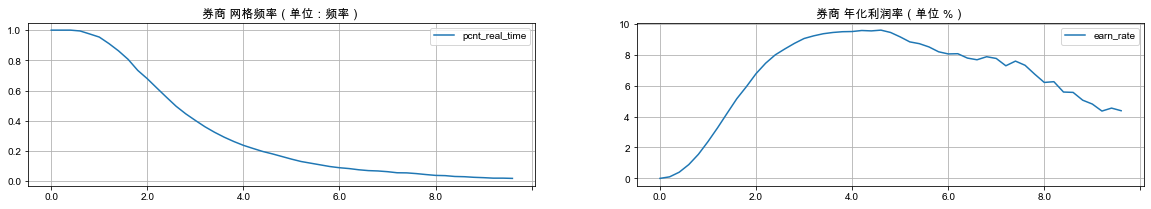

1289


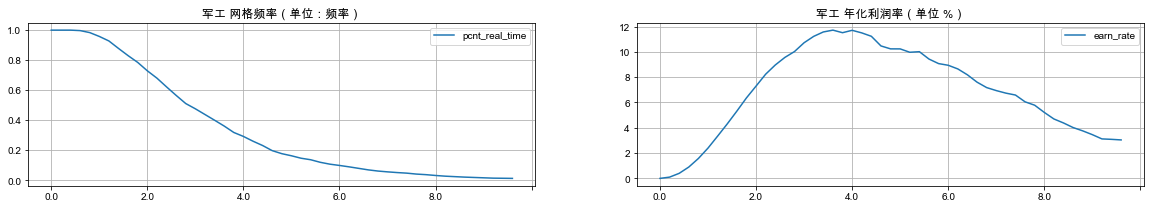

1180


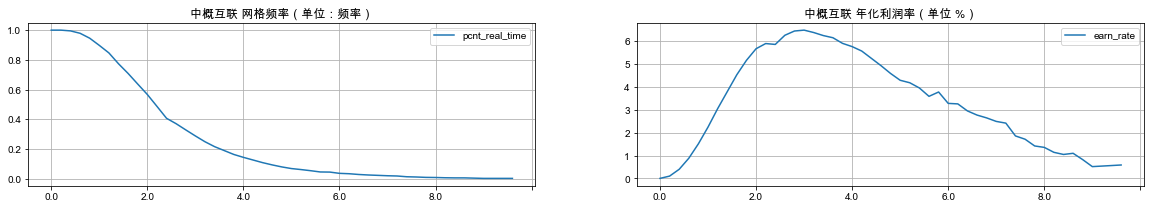

258


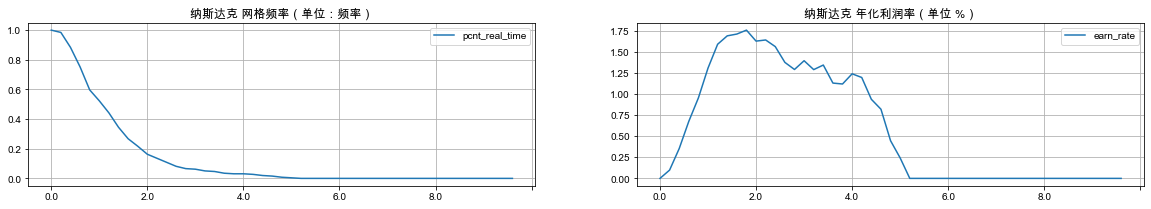

624


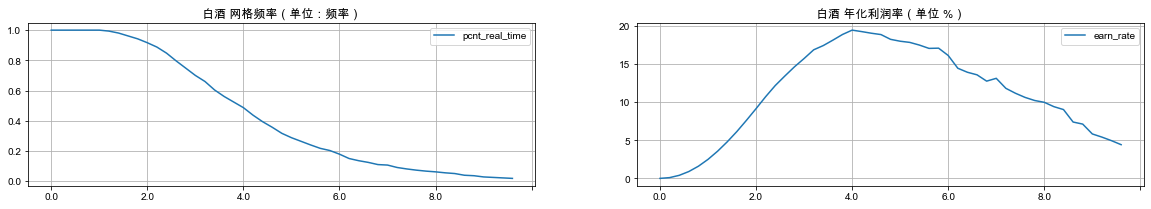

2322


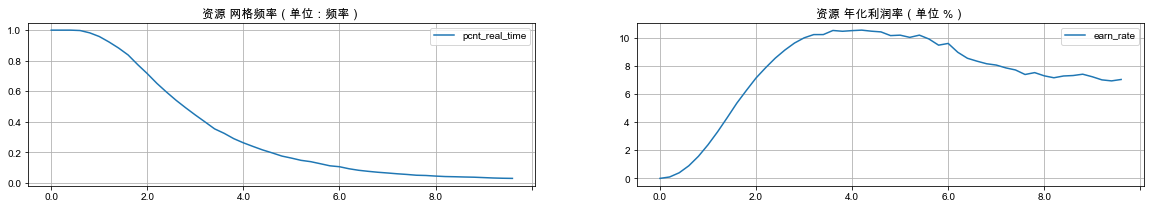

178


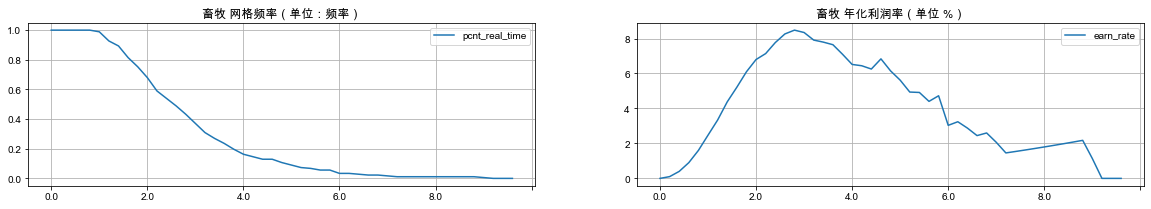

227


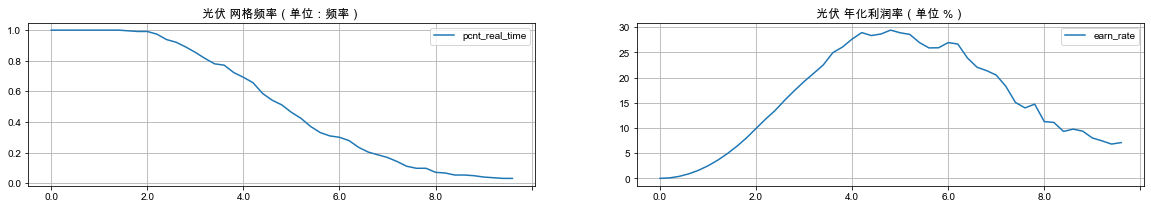

In [122]:
#等市值网格收益计算

stock = pd.read_csv('./stock.csv')
days = 10000
for row in stock.itertuples():
    compute_net_basic('./' + row[2] + '.csv', row[3], days)

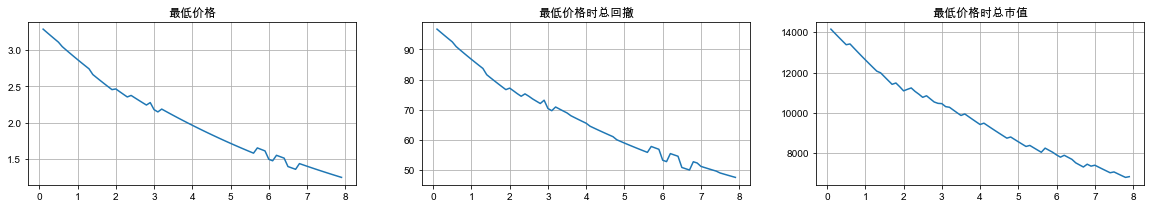

In [126]:
compute_constant_net_risk(10000, 5000, 3.338, buy_money=500)